In [50]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nehalbirla_vehicle_cardekho_path = kagglehub.dataset_download('nehalbirla/vehicle-dataset-from-cardekho')

print('Data source import complete.')

Using Colab cache for faster access to the 'vehicle-dataset-from-cardekho' dataset.
Data source import complete.


In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:

#import train dataset
df_car = pd.read_csv(f"{nehalbirla_vehicle_cardekho_path}/car data.csv")

# EDA

Load Data

In [26]:
df_car.shape #Checking the number of rows and columns

(301, 9)

In [7]:
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df_car.info() #getting some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Check Missing Value

In [9]:
df_car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
df_car.duplicated().sum() #Chedcking the duplicated row

np.int64(2)

Univariate

Distribution of one categorical variable

In [11]:
print(df_car['Fuel_Type'].value_counts())
print(df_car['Seller_Type'].value_counts())
print(df_car['Transmission'].value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Viaualization for distributation of categorical data

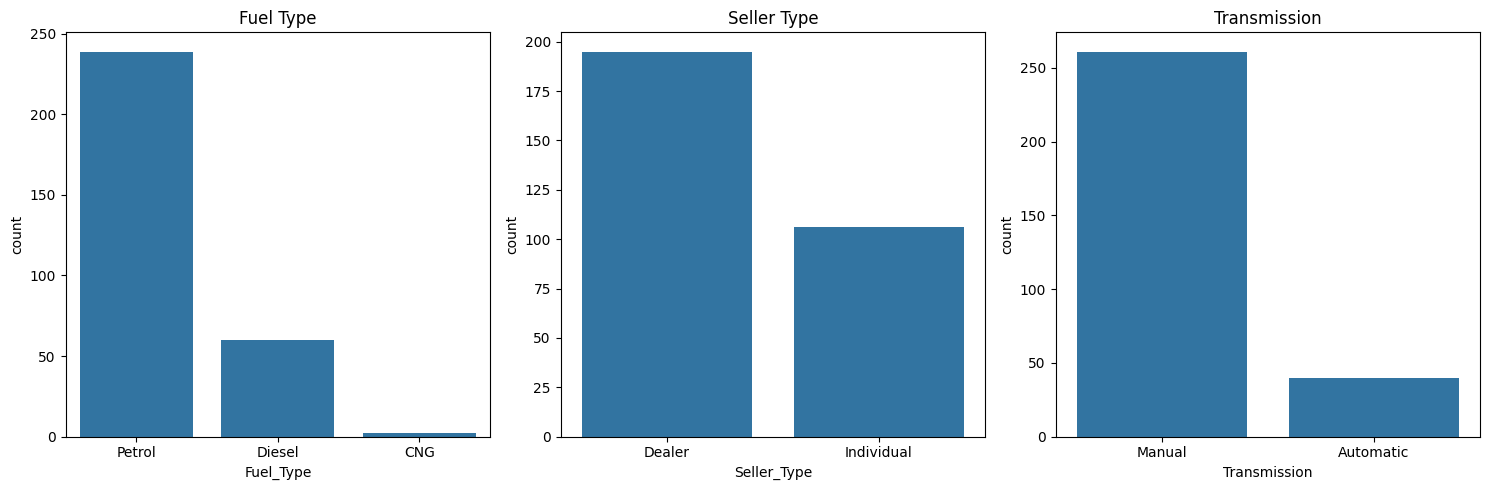

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,5))

plt.subplot(1,3,1) # Create a subplot layout with 1 row and 3 columns.This is the 1st plot position.
sns.countplot(x='Fuel_Type', data=df_car) # create countplot
plt.title("Fuel Type")# Add a title to this subplot.

plt.subplot(1,3,2) # Create a subplot layout with 1 row and 3 columns. This is the 2nd plot position
sns.countplot(x='Seller_Type', data=df_car) #create countplot
plt.title("Seller Type")# Add a title to this subplot.

plt.subplot(1,3,3) # Create a subplot layout with 1 row and 3 columns. This is the 3rd plot position.
sns.countplot(x='Transmission', data=df_car) #Create countplot
plt.title("Transmission")# Add a title to this subplot.

plt.tight_layout()
plt.show()

Univariate for Numerical Variables

In [13]:
print(df_car['Selling_Price'].describe())
print(df_car['Present_Price'].describe())
print(df_car['Kms_Driven'].describe())
print(df_car['Year'].describe())


count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64
count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64
count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64
count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64


Visualization for Numerical variables

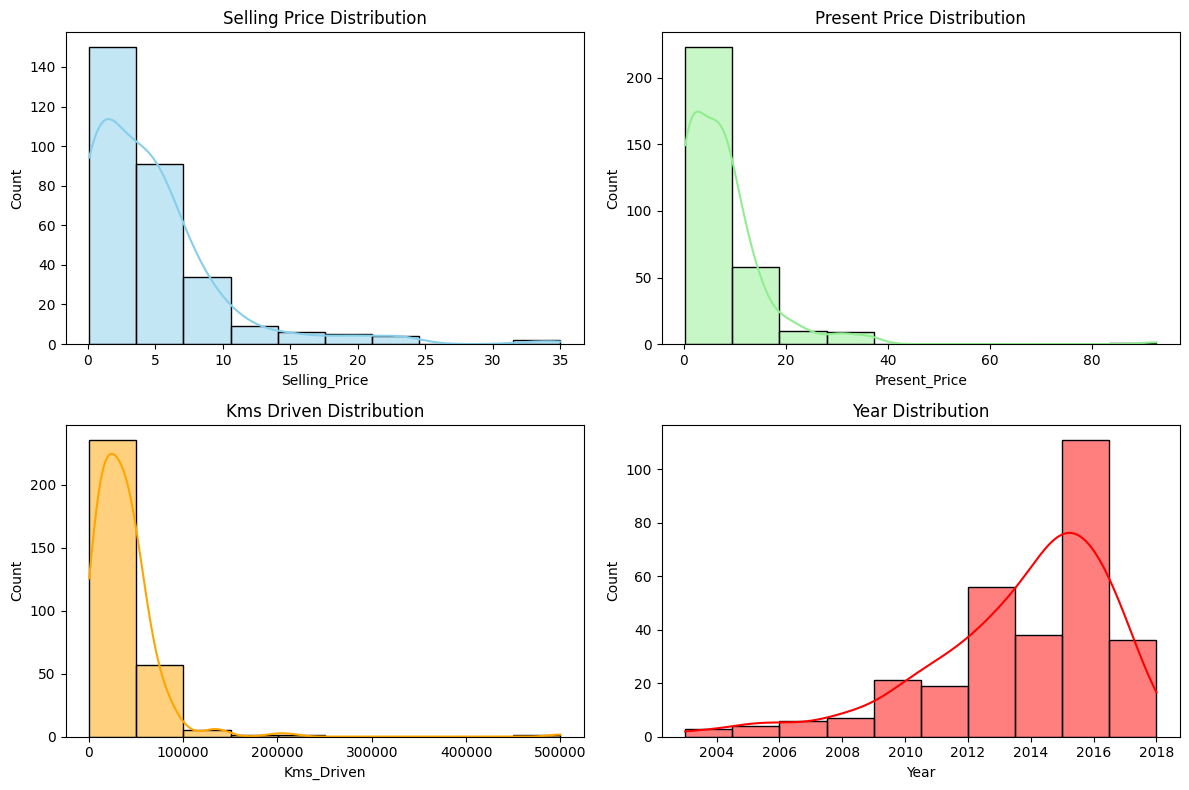

In [14]:
plt.figure(figsize=(12,8)) #create a figure wiht with=12, height =8

#First subplot(row 1,  column 1)
plt.subplot(2,2,1) # Create a subplot layout with
sns.histplot(df_car['Selling_Price'], bins=10, color='skyblue', edgecolor='black', kde=True) #create
plt.title('Selling Price Distribution') #add title

#Second subplot(row 1, column 2)
plt.subplot(2,2,2)
sns.histplot(df_car['Present_Price'], bins=10, color='lightgreen', edgecolor='black', kde=True)
plt.title('Present Price Distribution')

#Third subplot(row 2, column1)
plt.subplot(2,2,3)
sns.histplot(df_car['Kms_Driven'], bins=10, color='orange', edgecolor='black', kde=True)
plt.title('Kms Driven Distribution')

#Fourth subplot (row 2, column 2)
plt.subplot(2,2,4)
sns.histplot(df_car['Year'], bins=10, color='red', edgecolor='black', kde=True)
plt.title('Year Distribution')

plt.tight_layout()
plt.show()

# Bivariate

Numerical & Numerical

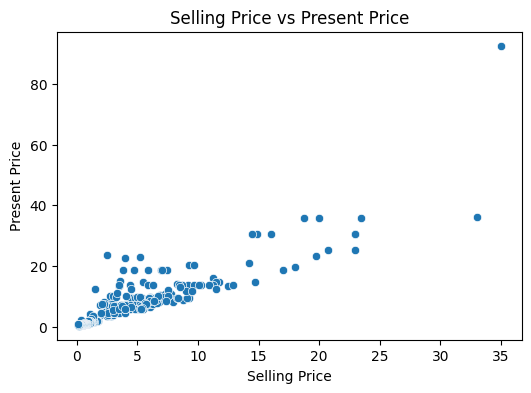

In [6]:
#Scatter plot: Selling Price vs Present Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='Selling_Price', y='Present_Price', data=df_car)
plt.title('Selling Price vs Present Price')
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.show()



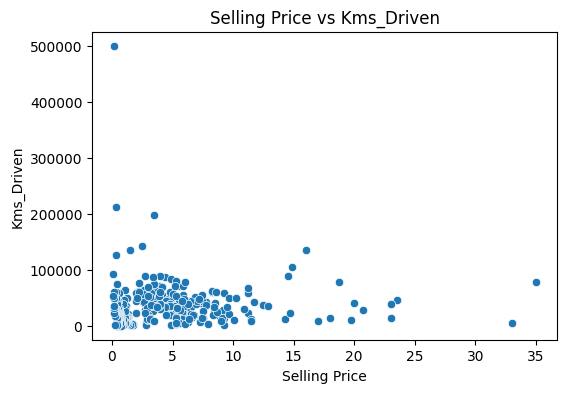

In [7]:
#Scatter plot: Selling Price vs Kms_Driven
plt.figure(figsize=(6,4))
sns.scatterplot(x='Selling_Price', y='Kms_Driven', data=df_car)
plt.xlabel('Selling Price')
plt.ylabel('Kms_Driven')
plt.title('Selling Price vs Kms_Driven')
plt.show()



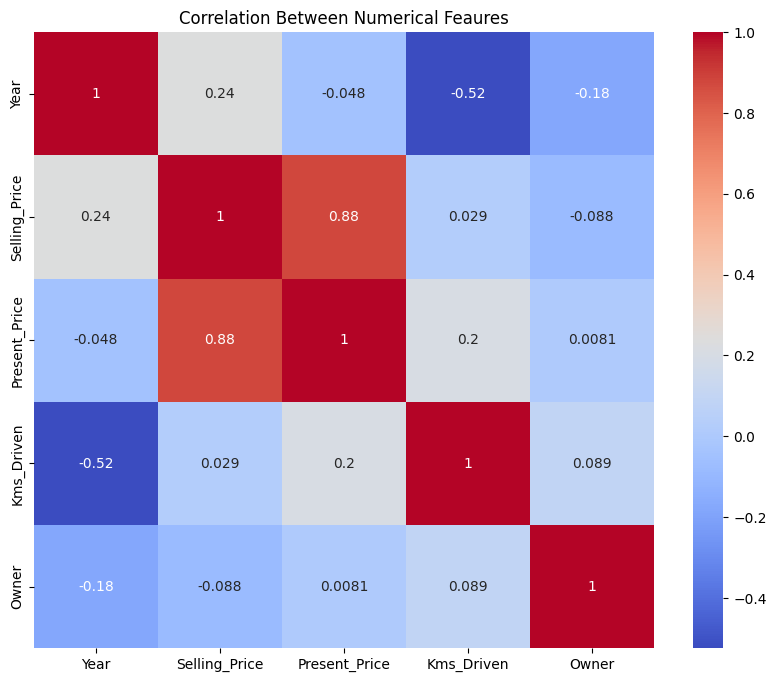

In [8]:
# Correlation heatmap (Numerical features only)
plt.figure(figsize=(10, 8))
sns.heatmap(df_car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Owner']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Feaures')
plt.show()

# 2. Categorical vs Numerical

Text(0, 0.5, 'Selling_Price')

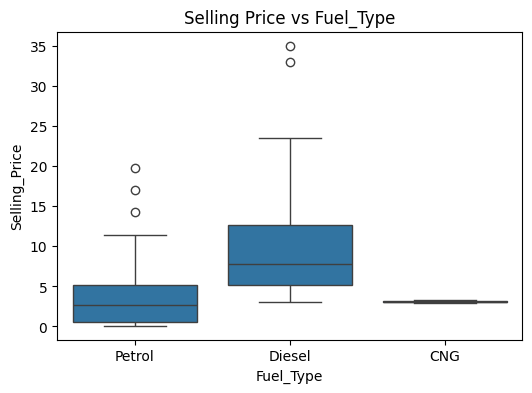

In [9]:
#Boxplot: Selling Price vs Fuel_Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df_car)
plt.title('Selling Price vs Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')

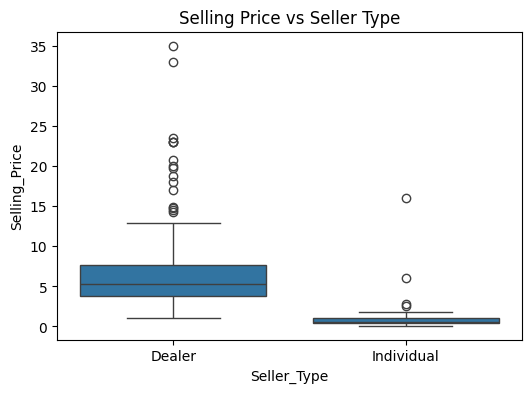

In [10]:
# Boxplot: Selling Price vs Seller_Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df_car)
plt.title("Selling Price vs Seller Type")
plt.show()

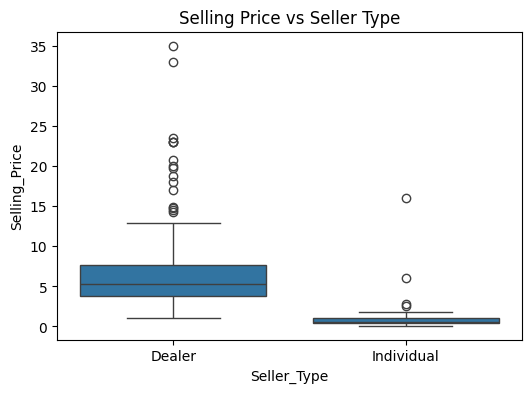

In [13]:
# Boxplot: Selling Price vs Seller_Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df_car)
plt.title("Selling Price vs Seller Type")
plt.show()

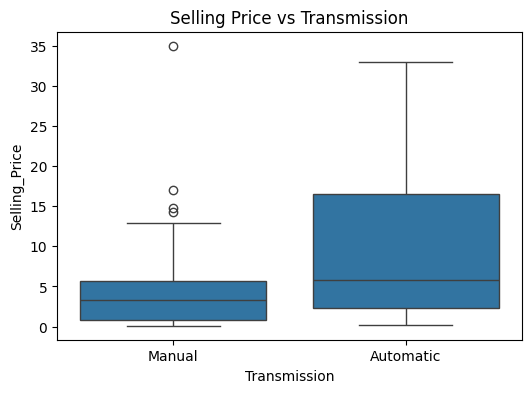

In [12]:
# Boxplot: Selling Price vs Transmission
plt.figure(figsize=(6,4))
sns.boxplot(x='Transmission', y='Selling_Price', data=df_car)
plt.title("Selling Price vs Transmission")
plt.show()

3. Categorical vs Categorical

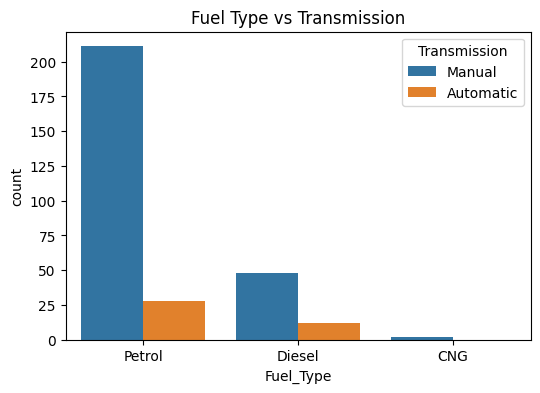

In [14]:
# Countplot: Fuel_Type vs Transmission
plt.figure(figsize=(6,4))
sns.countplot(x='Fuel_Type', hue='Transmission', data=df_car)
plt.title("Fuel Type vs Transmission")
plt.show()

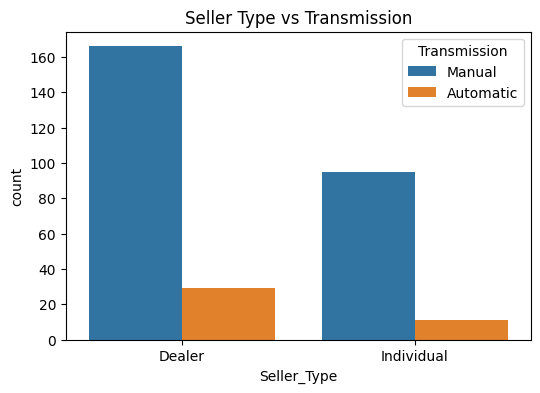

In [15]:
# Countplot: Seller_Type vs Transmission
plt.figure(figsize=(6,4))
sns.countplot(x='Seller_Type', hue='Transmission', data=df_car)
plt.title("Seller Type vs Transmission")
plt.show()

Feature Engineering

Encoding the Categorical Data

In [62]:
#Encoding "Fuel_Type" column
df_car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding "Seller_Type" column
df_car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding "Transmission" Column
df_car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-134404268.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-134404268.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-134404268.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-

In [63]:
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Split the training and testing data

In [64]:
X = df_car.drop(['Car_Name','Selling_Price'],axis=1)
Y = df_car['Selling_Price']

In [16]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [56]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state=2)

Model Trianing

1.   Linear Regression


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [35]:
from sklearn import metrics
y_pred = model.predict(X_test)
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.8365766715024998


In [37]:
from sklearn.metrics import mean_squared_error
# evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1.4663321311989073


Visualize the actual prices and Predicted Prices

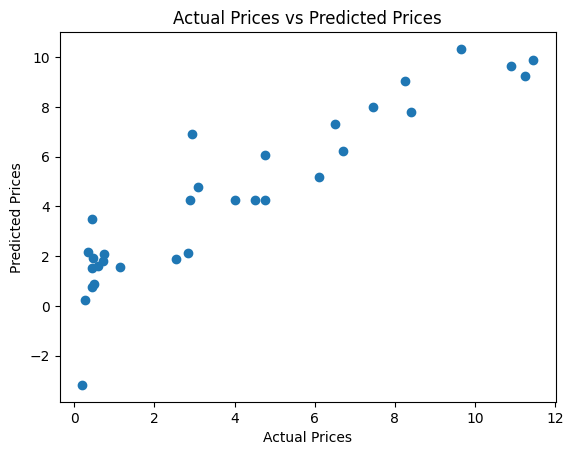

In [38]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

The regression model achieved an R² score of 0.8366, indicating that approximately 83.7% of the variance in actual prices is explained by the model. The RMSE value of 1.47 suggests that, on average, predictions deviate from the actual prices by about 1.47 units. The scatter plot of actual versus predicted prices shows a strong positive linear relationship, confirming good model performance with minor prediction errors.

# Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, Y_train)

Lasso()

In [67]:
from sklearn import metrics
y_pred = model.predict(X_test)
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.8709167941173195


In [68]:
from sklearn.metrics import mean_squared_error
# evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1.3031973759552113


Visualize the actual prices and Predicted Prices

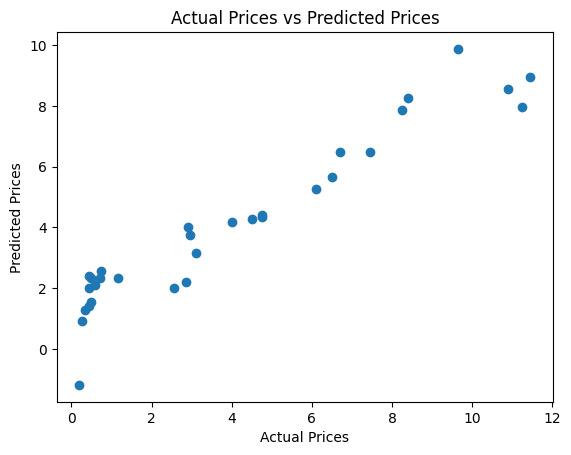

In [69]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()